### 10.1 퍼셉트론


#### 퍼셉트론
- Scikit-Learn 제공하는 퍼셉트론 모형 Perceptron 클래스
    - max_iter: 최적화를 위한 반복 횟수(iteration number)
    - eta0: 학습속도  η 
    - n_iter_no_change: 이 설정값만큼 반복을 해도 성능이 나아지지 않으면 max_iter 설정값과 상관없이 멈춘다.

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)

from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    model = Perceptron(max_iter=300, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침의 길이")
    plt.ylabel("꽃받침의 폭")
    plt.title("붓꽃 데이터(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1));


interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(max_iter=400, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]], dtype=int64)

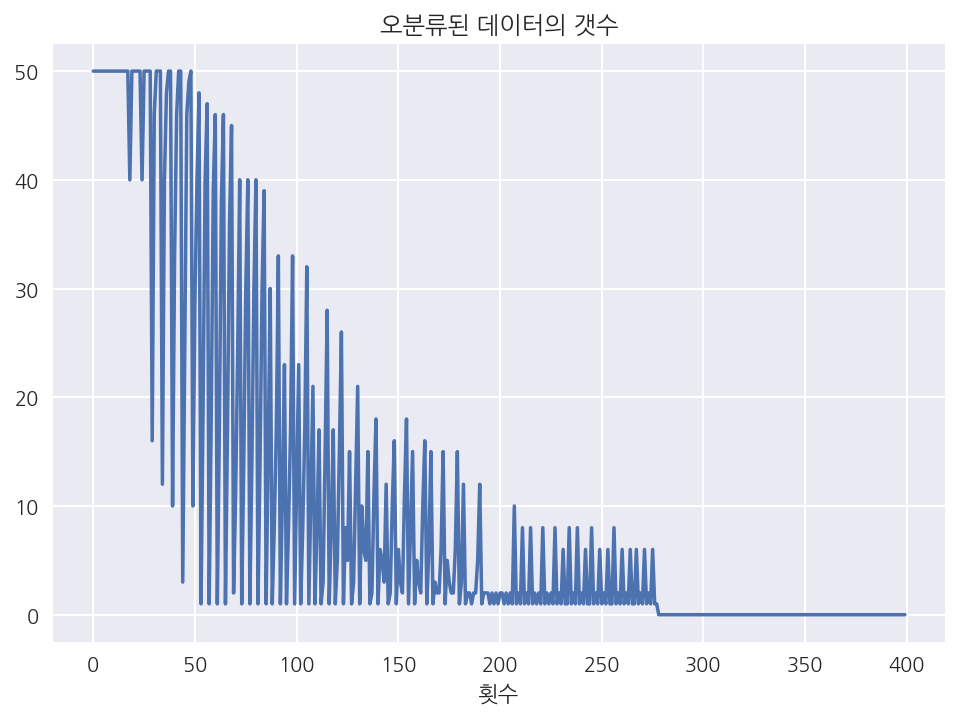

In [8]:
# 학습 성능
n = 400
loss = np.zeros(n)
model = Perceptron(warm_start=True, shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))

plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류된 데이터의 갯수")
plt.show()

#### SGD

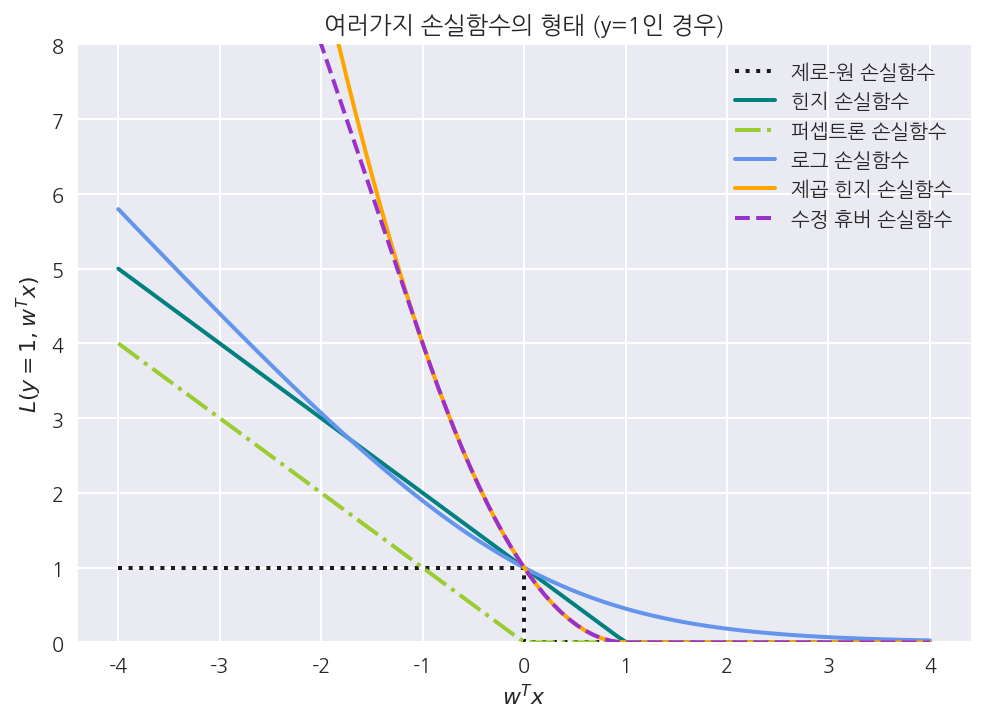

In [9]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss

xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='k', lw=2, ls=":", label="제로-원 손실함수")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=2, ls="-", label="힌지 손실함수")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=2, ls="-.", label="퍼셉트론 손실함수")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=2, label="로그 손실함수")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=2, label="제곱 힌지 손실함수")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=2, ls='--', label="수정 휴버 손실함수")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"$w^Tx$")
plt.ylabel(r"$L(y=1, w^Tx)$")
plt.title("여러가지 손실함수의 형태 (y=1인 경우)")
plt.show()

In [10]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n):
    model = SGDClassifier(loss="modified_huber", max_iter=n, shuffle=False, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침의 길이")
    plt.ylabel("꽃받침의 폭")
    plt.title("붓꽃 데이터(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

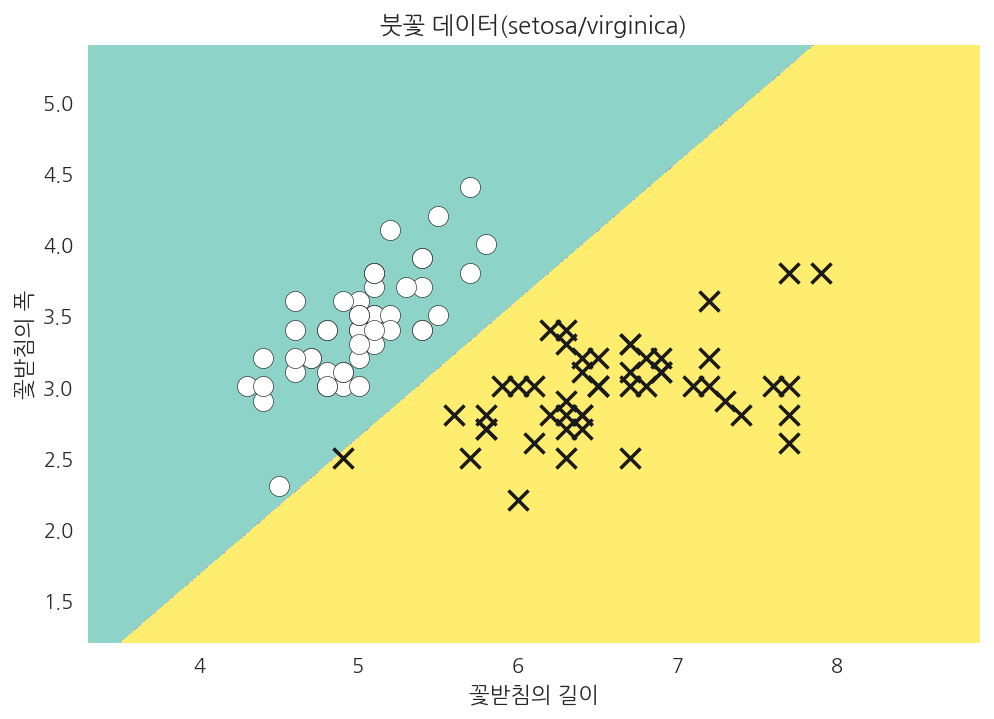

In [11]:
plot_sgd(400)

In [12]:
model = SGDClassifier(loss="modified_huber", max_iter=400, shuffle=False, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]], dtype=int64)

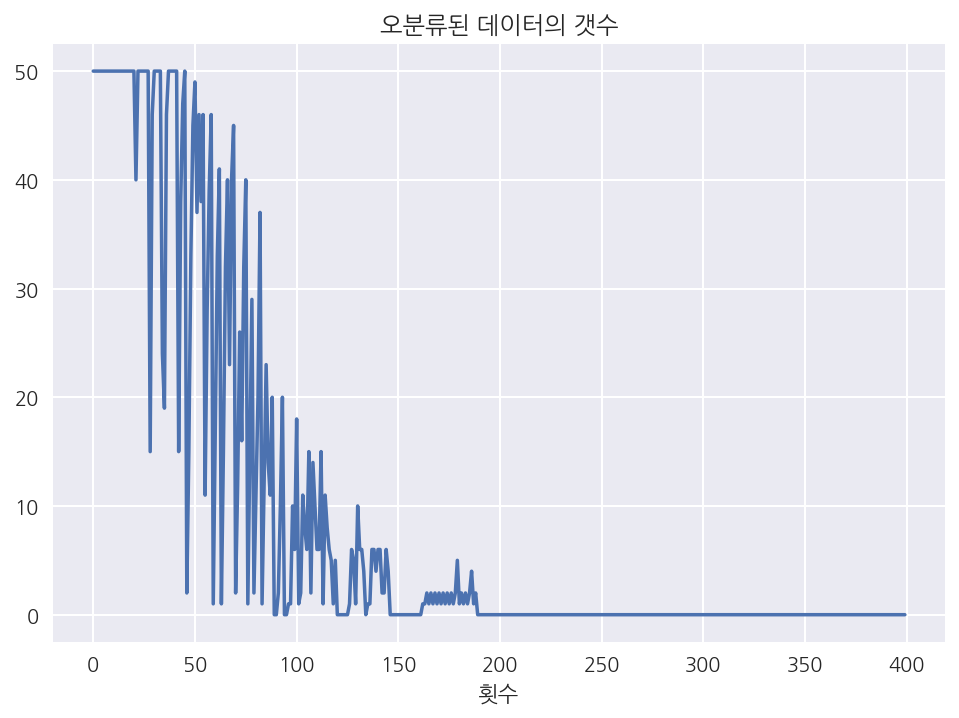

In [13]:
n = 400
loss = np.empty(n)
model = SGDClassifier(loss="modified_huber", shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))

plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류된 데이터의 갯수")
plt.show()

### 서포트벡터머신(SVM)

#### SVM
- SVC를 사용하여 모형을 구하면 다음과 같은 속성값을 가진다.
    - n_support_: 각 클래스의 서포트의 개수
    - support_: 각 클래스의 서포트의 인덱스
    - support_vectors_: 각 클래스의 서포트의 x 값.  x+ 와  x− 
    - coef_:  w  벡터
    - intercept_:  −w0 
    - dual_coef_: 각 원소가  ai⋅yi 로 이루어진 벡터


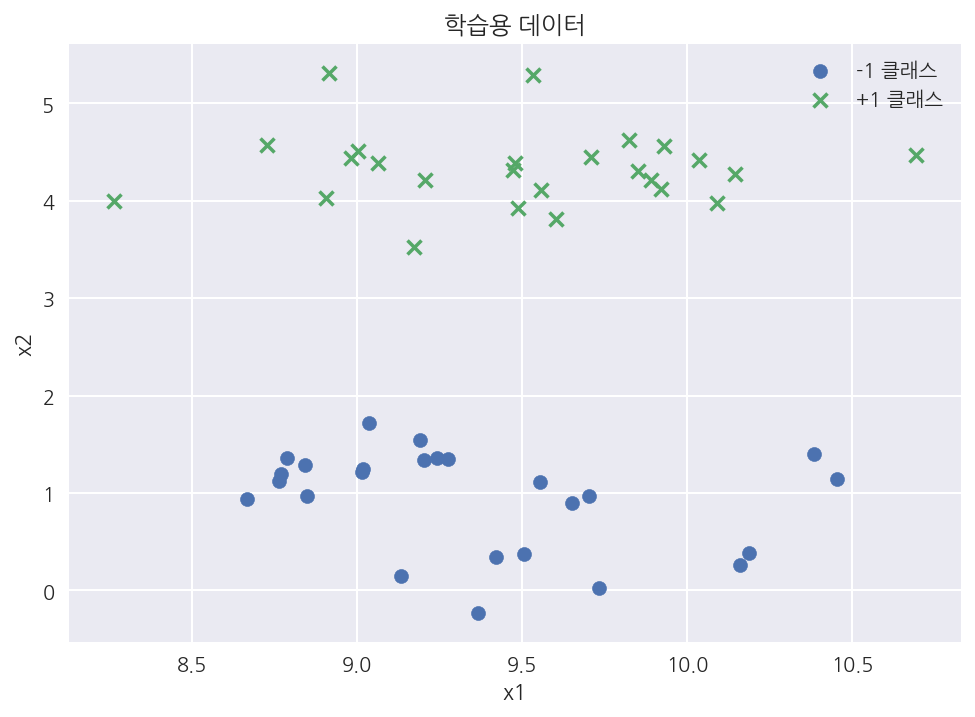

In [14]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

In [17]:
SVC(kernel='linear', C=1e10)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [18]:
model.n_support_

array([1, 1])

In [19]:
model.support_

array([42,  1])

In [20]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [21]:
y[model.support_]

array([-1,  1])

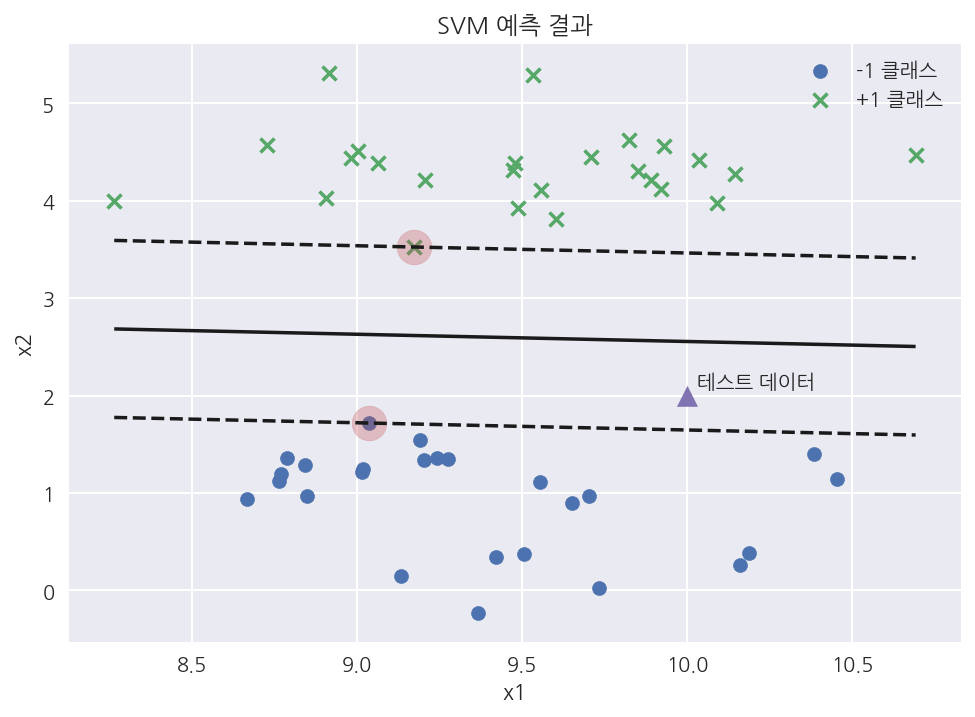

In [22]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [23]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

In [24]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [25]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [26]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
    model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
    model.intercept_

array([-0.61101582])